In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('tesla.csv')

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200


<AxesSubplot:>

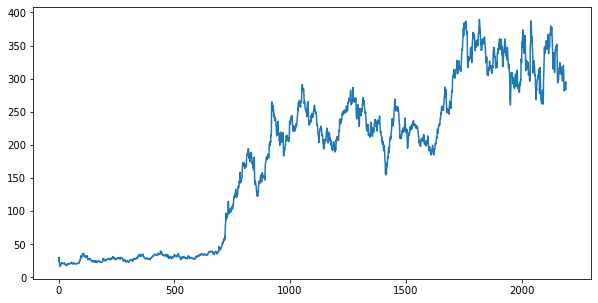

In [4]:
data['High'].plot(figsize=(10,5))

In [6]:
data.shape

(2193, 7)

In [64]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# ndata= data.reset_index(inplace=True)
# #ndata.dropna()
# output = seasonal_decompose(ndata)
 
# # creating plot
# #output.plot()

In [65]:
## Each row will contain D days of close data and I want to predict the close value for day D+1

# Model 1

In [66]:
data=data[['Date','Close']]

In [67]:
data

,Date,Close
0,29-06-2010,23.889999
1,30-06-2010,23.830000
2,01-07-2010,21.959999
3,02-07-2010,19.200001
4,06-07-2010,16.110001
...,...,...
2188,11-03-2019,290.920013
2189,12-03-2019,283.359985
2190,13-03-2019,288.959991
2191,14-03-2019,289.959991


In [68]:
# data['sample-']=data['Close'].shift(-1)
# data['sample+']=data['Close'].shift(1)
# data

In [69]:
# 23.889999 23.830000 21.959999 ...
# 23.830000 21.959999 ...
# 21.959999

In [70]:
## Prepare time series data
days=15
for ii in range(days+1):
    data[f'Close_{ii}']=data['Close'].shift(-ii)

C:\Users\tette\AppData\Local\Temp\ipykernel_904\758209505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'Close_{ii}']=data['Close'].shift(-ii)
C:\Users\tette\AppData\Local\Temp\ipykernel_904\758209505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'Close_{ii}']=data['Close'].shift(-ii)
C:\Users\tette\AppData\Local\Temp\ipykernel_904\758209505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [71]:
data_red=data.iloc[:,2:].dropna()

In [72]:
data_red.head()

,Close_0,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,Close_9,Close_10,Close_11,Close_12,Close_13,Close_14,Close_15
0,23.889999,23.830000,21.959999,19.200001,16.110001,15.800000,17.459999,17.400000,17.049999,18.139999,19.840000,19.889999,20.639999,21.910000,20.299999,20.219999
1,23.830000,21.959999,19.200001,16.110001,15.800000,17.459999,17.400000,17.049999,18.139999,19.840000,19.889999,20.639999,21.910000,20.299999,20.219999,21.000000
2,21.959999,19.200001,16.110001,15.800000,17.459999,17.400000,17.049999,18.139999,19.840000,19.889999,20.639999,21.910000,20.299999,20.219999,21.000000,21.290001
3,19.200001,16.110001,15.800000,17.459999,17.400000,17.049999,18.139999,19.840000,19.889999,20.639999,21.910000,20.299999,20.219999,21.000000,21.290001,20.950001
4,16.110001,15.800000,17.459999,17.400000,17.049999,18.139999,19.840000,19.889999,20.639999,21.910000,20.299999,20.219999,21.000000,21.290001,20.950001,20.549999


In [12]:
X= data_red.drop('Close_15',axis=1) ## feature matrix (close values for days 0-14)
y= data_red['Close_15']             ## target variable (close value for day 15)


In [13]:
X

,Close_0,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,Close_9,Close_10,Close_11,Close_12,Close_13,Close_14
0,23.889999,23.830000,21.959999,19.200001,16.110001,15.800000,17.459999,17.400000,17.049999,18.139999,19.840000,19.889999,20.639999,21.910000,20.299999
1,23.830000,21.959999,19.200001,16.110001,15.800000,17.459999,17.400000,17.049999,18.139999,19.840000,19.889999,20.639999,21.910000,20.299999,20.219999
2,21.959999,19.200001,16.110001,15.800000,17.459999,17.400000,17.049999,18.139999,19.840000,19.889999,20.639999,21.910000,20.299999,20.219999,21.000000
3,19.200001,16.110001,15.800000,17.459999,17.400000,17.049999,18.139999,19.840000,19.889999,20.639999,21.910000,20.299999,20.219999,21.000000,21.290001
4,16.110001,15.800000,17.459999,17.400000,17.049999,18.139999,19.840000,19.889999,20.639999,21.910000,20.299999,20.219999,21.000000,21.290001,20.950001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,307.880005,305.640015,302.559998,291.230011,294.709991,298.769989,297.859985,314.739990,319.880005,294.790009,285.359985,276.540009,276.239990,276.589996,284.140015
2174,305.640015,302.559998,291.230011,294.709991,298.769989,297.859985,314.739990,319.880005,294.790009,285.359985,276.540009,276.239990,276.589996,284.140015,290.920013
2175,302.559998,291.230011,294.709991,298.769989,297.859985,314.739990,319.880005,294.790009,285.359985,276.540009,276.239990,276.589996,284.140015,290.920013,283.359985
2176,291.230011,294.709991,298.769989,297.859985,314.739990,319.880005,294.790009,285.359985,276.540009,276.239990,276.589996,284.140015,290.920013,283.359985,288.959991


### Prepare for Training

In [14]:
# Fully Connected Neural Network


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
X_train.head()

,Close_0,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,Close_9,Close_10,Close_11,Close_12,Close_13,Close_14
944,208.449997,216.970001,230.289993,225.399994,212.229996,207.520004,215.460007,216.929993,204.190002,203.779999,198.089996,193.910004,199.110001,198.119995,204.380005
1946,309.100006,301.540009,304.179993,279.179993,257.779999,266.130005,252.479996,267.529999,286.940002,305.720001,299.299988,289.660004,304.700012,300.929993,294.079987
1513,216.500000,213.979996,214.440002,215.940002,216.779999,224.779999,224.649994,222.529999,221.529999,220.399994,226.250000,225.259995,228.360001,220.500000,222.270004
1110,246.720001,248.089996,248.440002,244.520004,231.639999,231.429993,229.300003,228.279999,223.710007,214.360001,216.889999,209.839996,208.880005,207.000000,204.039993
1610,188.660004,185.020004,184.520004,191.169998,193.139999,196.649994,196.119995,189.570007,189.399994,181.880005,181.470001,186.800003,185.850006,193.149994,192.289993


In [18]:
X_train.iloc[0:5,:6] ## just to better understand iloc vs loc

,Close_0,Close_1,Close_2,Close_3,Close_4,Close_5
944,208.449997,216.970001,230.289993,225.399994,212.229996,207.520004
1946,309.100006,301.540009,304.179993,279.179993,257.779999,266.130005
1513,216.500000,213.979996,214.440002,215.940002,216.779999,224.779999
1110,246.720001,248.089996,248.440002,244.520004,231.639999,231.429993
1610,188.660004,185.020004,184.520004,191.169998,193.139999,196.649994


In [19]:
X_train.iloc[0,:] ## this access by position

Close_0     208.449997
Close_1     216.970001
Close_2     230.289993
Close_3     225.399994
Close_4     212.229996
Close_5     207.520004
Close_6     215.460007
Close_7     216.929993
Close_8     204.190002
Close_9     203.779999
Close_10    198.089996
Close_11    193.910004
Close_12    199.110001
Close_13    198.119995
Close_14    204.380005
Name: 944, dtype: float64

In [20]:
X_train.loc[944,:] ## this access by index value

Close_0     208.449997
Close_1     216.970001
Close_2     230.289993
Close_3     225.399994
Close_4     212.229996
Close_5     207.520004
Close_6     215.460007
Close_7     216.929993
Close_8     204.190002
Close_9     203.779999
Close_10    198.089996
Close_11    193.910004
Close_12    199.110001
Close_13    198.119995
Close_14    204.380005
Name: 944, dtype: float64

In [21]:

## Neural Network: Fully connected

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, LSTM, RNN, GRU

In [23]:
# Conv2D --> images
# Conv1D --> signals (audio, others), time series
# LSTM   --> a type of RNN that is mainly used for time series
# Dropout ->

# Recurrent layers in Tensorflow: RNN, LSTM, GRU
# Convolutional Neural Network: Conv2D + MaxPool2D + Flatten + Dense

In [24]:
model=Sequential()
model.add(Dense(128,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))



In [25]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])

In [26]:
X_train.shape

(1742, 15)

In [27]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
55/55 [==============================] - 1s 4ms/step - loss: 5996.2866 - mean_absolute_error: 37.7678 - val_loss: 137.2250 - val_mean_absolute_error: 7.8165
Epoch 2/10
55/55 [==============================] - 0s 2ms/step - loss: 151.1806 - mean_absolute_error: 8.1671 - val_loss: 131.2826 - val_mean_absolute_error: 7.5790
Epoch 3/10
55/55 [==============================] - 0s 2ms/step - loss: 132.8417 - mean_absolute_error: 7.6742 - val_loss: 112.0643 - val_mean_absolute_error: 7.0335
Epoch 4/10
55/55 [==============================] - 0s 2ms/step - loss: 126.7228 - mean_absolute_error: 7.4265 - val_loss: 101.9597 - val_mean_absolute_error: 6.7277
Epoch 5/10
55/55 [==============================] - 0s 2ms/step - loss: 111.2619 - mean_absolute_error: 6.9757 - val_loss: 102.0898 - val_mean_absolute_error: 6.6137
Epoch 6/10
55/55 [==============================] - 0s 2ms/step - loss: 106.5004 - mean_absolute_error: 6.8279 - val_loss: 87.6970 - val_mean_absolute_error: 6.2066
Epo

In [28]:
y_pred_test=model.predict(X_test)

### Evaluate predictions

In [33]:
from sklearn.metrics import mean_absolute_error

In [29]:
y_pred=model.predict(X)

In [30]:
y.values #3 True values

array([ 20.219999,  21.      ,  21.290001, ..., 288.959991, 289.959991,
       275.429993])

In [31]:
y_pred ## Predictions

array([[ 19.840586],
       [ 20.197826],
       [ 20.693712],
       ...,
       [288.73636 ],
       [288.08487 ],
       [286.2895  ]], dtype=float32)

In [101]:
y_pred_test=model.predict(X_test)

In [35]:
print('MAE: ',mean_absolute_error(y,y_pred))

MAE:  5.510572051768854


In [102]:
print('Test MAE: ',mean_absolute_error(y_test,y_pred_test))

Test MAE:  5.313058140899098


Text(0, 0.5, 'Close')

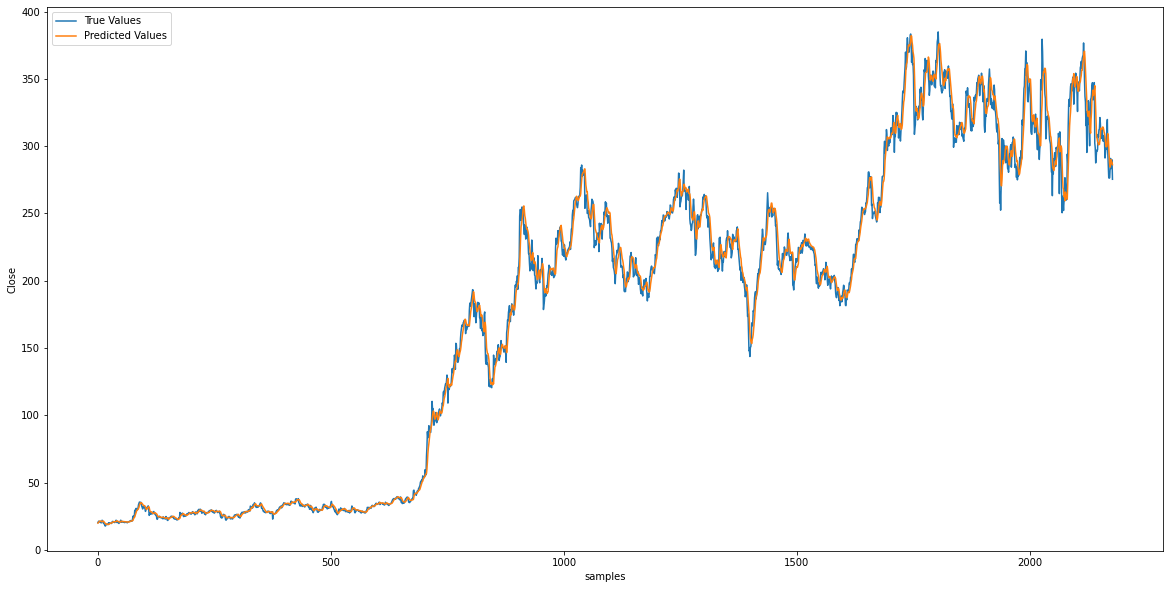

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(y,label='True Values')
plt.plot(y_pred,label='Predicted Values')
plt.legend()
plt.xlabel('samples')
plt.ylabel('Close')

In [ ]:
#matrix evaluation of distance (absolute mean square error)

In [39]:
y.values

array([ 20.219999,  21.      ,  21.290001, ..., 288.959991, 289.959991,
       275.429993])

In [78]:
output=pd.DataFrame({'true_val':y}) ## creates a dataframe
output['true_val_group']=pd.qcut(output['true_val'],10)
output

,true_val,true_val_group
0,20.219999,"(17.599, 26.924]"
1,21.000000,"(17.599, 26.924]"
2,21.290001,"(17.599, 26.924]"
3,20.950001,"(17.599, 26.924]"
4,20.549999,"(17.599, 26.924]"
...,...,...
2173,290.920013,"(289.58, 327.114]"
2174,283.359985,"(249.873, 289.58]"
2175,288.959991,"(249.873, 289.58]"
2176,289.959991,"(289.58, 327.114]"


In [74]:
output.true_val_group.unique()

[(17.599, 26.924], (26.924, 30.758], (30.758, 37.851], (37.851, 173.446], (173.446, 205.605], (205.605, 225.002], (225.002, 249.873], (249.873, 289.58], (289.58, 327.114], (327.114, 385.0]]
Categories (10, interval[float64]): [(17.599, 26.924] < (26.924, 30.758] < (30.758, 37.851] < (37.851, 173.446] ... (225.002, 249.873] < (249.873, 289.58] < (289.58, 327.114] < (327.114, 385.0]]

In [86]:
output_pred=pd.DataFrame({'pred_val':y_pred.ravel()})
output_pred['pred_val_group']=pd.qcut(output['true_val'],10)


In [87]:
output_true=output.groupby('true_val_group').agg({'true_val':'mean'}).reset_index()

In [88]:
output_pred=output_pred.groupby('pred_val_group').agg({'pred_val':'mean'}).reset_index()

In [89]:
output_pred

,pred_val_group,pred_val
0,"(17.599, 26.924]",23.641539
1,"(26.924, 30.758]",28.856203
2,"(30.758, 37.851]",33.514984
3,"(37.851, 173.446]",113.706108
4,"(173.446, 205.605]",195.209579
5,"(205.605, 225.002]",217.081528
6,"(225.002, 249.873]",236.904251
7,"(249.873, 289.58]",266.413086
8,"(289.58, 327.114]",312.133667
9,"(327.114, 385.0]",346.070160


In [90]:
output_true

,true_val_group,true_val
0,"(17.599, 26.924]",23.208624
1,"(26.924, 30.758]",28.587982
2,"(30.758, 37.851]",33.491651
3,"(37.851, 173.446]",114.016543
4,"(173.446, 205.605]",193.718670
5,"(205.605, 225.002]",215.241926
6,"(225.002, 249.873]",236.830092
7,"(249.873, 289.58]",264.826836
8,"(289.58, 327.114]",308.775413
9,"(327.114, 385.0]",348.525689


In [91]:
final_output=pd.merge(output_true,output_pred,left_on='true_val_group',right_on='pred_val_group').drop('pred_val_group',axis=1)
final_output['diff_%']=(final_output['pred_val'] - final_output['true_val'])/final_output['true_val']*100

In [92]:
final_output

,true_val_group,true_val,pred_val,diff_%
0,"(17.599, 26.924]",23.208624,23.641539,1.865318
1,"(26.924, 30.758]",28.587982,28.856203,0.938232
2,"(30.758, 37.851]",33.491651,33.514984,0.069667
3,"(37.851, 173.446]",114.016543,113.706108,-0.272272
4,"(173.446, 205.605]",193.718670,195.209579,0.769626
5,"(205.605, 225.002]",215.241926,217.081528,0.854667
6,"(225.002, 249.873]",236.830092,236.904251,0.031313
7,"(249.873, 289.58]",264.826836,266.413086,0.598976
8,"(289.58, 327.114]",308.775413,312.133667,1.087604
9,"(327.114, 385.0]",348.525689,346.070160,-0.704547


# Model 2: Linear Regression

In [95]:
from sklearn.linear_model import LinearRegression

In [103]:
model2=LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [104]:
y_pred2=model2.predict(X_test)

In [105]:
mean_absolute_error(y_test,y_pred2)

3.315582509790901

# Model 3: Random Forest

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
model3=RandomForestRegressor()
model3.fit(X_train,y_train)

RandomForestRegressor()

In [109]:
y_pred3=model3.predict(X_test)

In [110]:
mean_absolute_error(y_test,y_pred3)

3.6337087317889907

# Model 4: XGBoost

In [112]:
from xgboost import XGBRegressor

In [113]:
model4=XGBRegressor()
model4.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [114]:
y_pred4=model4.predict(X_test)

In [115]:
mean_absolute_error(y_test,y_pred4)

4.091311438130511

# Model 5: LSTM

In [116]:
data=pd.read_csv('tesla.csv')

In [117]:
data=data[['Date','Close']]

In [118]:
days=2
for ii in range(days+1):
    data[f'Close_{ii}']=data['Close'].shift(-ii)

In [119]:
data_red=data.iloc[:,2:].dropna()

In [120]:
X=data_red.drop('Close_2',axis=1)
y=data_red['Close_2']

In [121]:
X

,Close_0,Close_1
0,23.889999,23.830000
1,23.830000,21.959999
2,21.959999,19.200001
3,19.200001,16.110001
4,16.110001,15.800000
...,...,...
2186,276.589996,284.140015
2187,284.140015,290.920013
2188,290.920013,283.359985
2189,283.359985,288.959991


In [122]:
y

0        21.959999
1        19.200001
2        16.110001
3        15.800000
4        17.459999
           ...    
2186    290.920013
2187    283.359985
2188    288.959991
2189    289.959991
2190    275.429993
Name: Close_2, Length: 2191, dtype: float64

## Prepare for Training

In [123]:
train_index=int(X.shape[0]*0.8)

In [124]:
X_train,X_test=X.iloc[:train_index,:] , X.iloc[train_index:,:]
y_train,y_test=y.iloc[:train_index] , y.iloc[train_index:]

In [125]:
X_train.shape

(1752, 2)

In [126]:
import numpy as np
X_train=np.expand_dims(X_train.values,1)
X_test=np.expand_dims(X_test.values,1)

In [127]:
X_train.shape

(1752, 1, 2)

In [128]:
model=Sequential()
model.add(LSTM(128,input_shape=(1,2),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

In [129]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67072     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 77,441
Trainable params: 77,441
Non-trainable params: 0
_________________________________________________________________


In [130]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])

In [131]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
55/55 [==============================] - 1s 6ms/step - loss: 17483.6738 - mean_absolute_error: 99.0743 - val_loss: 2818.2864 - val_mean_absolute_error: 51.5153
Epoch 2/10
55/55 [==============================] - 0s 3ms/step - loss: 152.5174 - mean_absolute_error: 7.3921 - val_loss: 129.2327 - val_mean_absolute_error: 8.5848
Epoch 3/10
55/55 [==============================] - 0s 3ms/step - loss: 27.8099 - mean_absolute_error: 3.3558 - val_loss: 124.7058 - val_mean_absolute_error: 8.2760
Epoch 4/10
55/55 [==============================] - 0s 3ms/step - loss: 25.5757 - mean_absolute_error: 3.1452 - val_loss: 107.1924 - val_mean_absolute_error: 7.5714
Epoch 5/10
55/55 [==============================] - 0s 3ms/step - loss: 23.9073 - mean_absolute_error: 3.0432 - val_loss: 102.8036 - val_mean_absolute_error: 7.2889
Epoch 6/10
55/55 [==============================] - 0s 3ms/step - loss: 23.0025 - mean_absolute_error: 2.9949 - val_loss: 102.1688 - val_mean_absolute_error: 7.2862
Epo

In [132]:
y_test_pred=model.predict(X_test).ravel()

### Evaluate predictions

In [133]:
X_new=np.expand_dims(X.values,1)

In [134]:
y_pred=model.predict(X_new)

In [135]:
y.values #3 True values

array([ 21.959999,  19.200001,  16.110001, ..., 288.959991, 289.959991,
       275.429993])

In [136]:
y_pred ## Predictions

array([[ 24.133358],
       [ 22.846922],
       [ 20.271515],
       ...,
       [281.76205 ],
       [286.72842 ],
       [287.77448 ]], dtype=float32)

Text(0, 0.5, 'Close')

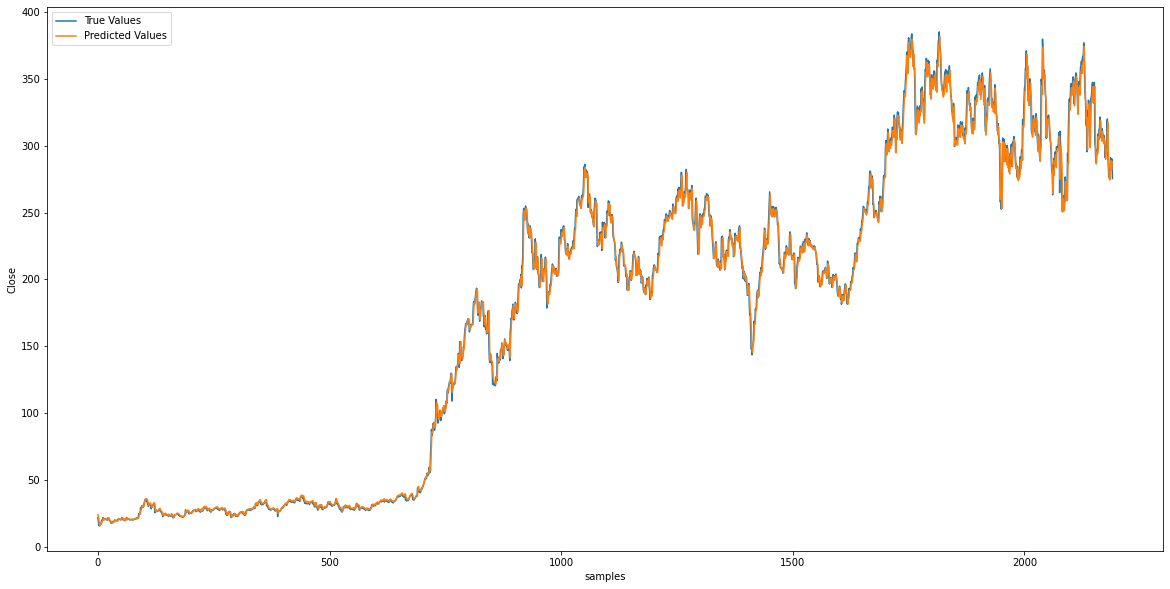

In [137]:
## this plot is for the whole dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(y,label='True Values')
plt.plot(y_pred,label='Predicted Values')
plt.legend()
plt.xlabel('samples')
plt.ylabel('Close')

In [138]:
y_pred_test=model.predict(X_test).ravel()

In [140]:
mean_absolute_error(y_test,y_pred_test)

7.457008734681982

Text(0, 0.5, 'Close')

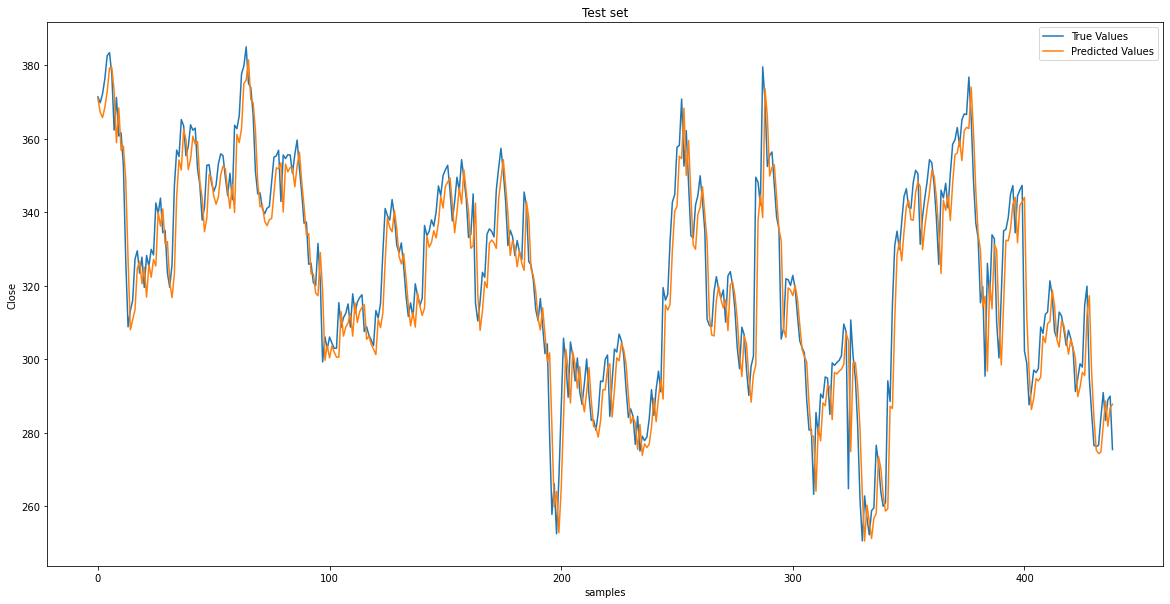

In [139]:
## this plot is for the whole dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.title('Test set')
plt.plot(y_test.values,label='True Values')
plt.plot(y_pred_test,label='Predicted Values')
plt.legend()
plt.xlabel('samples')
plt.ylabel('Close')

# Model 6: CNN

In [154]:
X_train.shape

(1752, 1, 2)

In [165]:
X_train_new=np.transpose(X_train,(0,2,1))
X_test_new=np.transpose(X_test,(0,2,1))

In [180]:
from tensorflow.keras.layers import Flatten

In [206]:
model6=Sequential()
model6.add(Conv1D(32, (2), activation='relu' , input_shape=( 2,1)))
model6.add(LSTM(128,activation='relu'))
model6.add(Dense(64,activation='relu'))
model6.add(Dense(32,activation='relu'))
model6.add(Dense(1))

In [200]:
model6.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 1, 32)             96        
                                                                 
 lstm_11 (LSTM)              (None, 128)               82432     
                                                                 
 dense_44 (Dense)            (None, 64)                8256      
                                                                 
 dense_45 (Dense)            (None, 32)                2080      
                                                                 
 dense_46 (Dense)            (None, 1)                 33        
                                                                 
Total params: 92,897
Trainable params: 92,897
Non-trainable params: 0
_________________________________________________________________


In [201]:
model6.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])

In [202]:
model6.fit(X_train_new,y_train,validation_data=(X_test_new,y_test),epochs=10)

Epoch 1/10
55/55 [==============================] - 2s 8ms/step - loss: 8362.6797 - mean_absolute_error: 55.6871 - val_loss: 145.7802 - val_mean_absolute_error: 9.5177
Epoch 2/10
55/55 [==============================] - 0s 3ms/step - loss: 35.6770 - mean_absolute_error: 3.9120 - val_loss: 112.0386 - val_mean_absolute_error: 7.8154
Epoch 3/10
55/55 [==============================] - 0s 3ms/step - loss: 23.9230 - mean_absolute_error: 3.0674 - val_loss: 111.5096 - val_mean_absolute_error: 7.7728
Epoch 4/10
55/55 [==============================] - 0s 3ms/step - loss: 23.8936 - mean_absolute_error: 3.0333 - val_loss: 114.3786 - val_mean_absolute_error: 7.6815
Epoch 5/10
55/55 [==============================] - 0s 3ms/step - loss: 24.2267 - mean_absolute_error: 3.0666 - val_loss: 110.8067 - val_mean_absolute_error: 7.6336
Epoch 6/10
55/55 [==============================] - 0s 3ms/step - loss: 23.6666 - mean_absolute_error: 3.0365 - val_loss: 118.8438 - val_mean_absolute_error: 7.8418
Epoch 7

In [204]:
y_pred_test6=model6.predict(X_test_new).ravel()

In [205]:
mean_absolute_error(y_test,y_pred_test6)

7.644577730217379

## Section 2

In [8]:
data2=pd.read_csv('tesla.csv')

In [9]:
## multicolinearity: several features (columns) are highly correlated --> this can hurt the training

In [10]:
data2

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200


In [11]:
data2[['Date','Close']]

,Date,Close
0,29-06-2010,23.889999
1,30-06-2010,23.830000
2,01-07-2010,21.959999
3,02-07-2010,19.200001
4,06-07-2010,16.110001
...,...,...
2188,11-03-2019,290.920013
2189,12-03-2019,283.359985
2190,13-03-2019,288.959991
2191,14-03-2019,289.959991


# Model 7 LSTM with Adjusted Features

In [12]:
X=data2.drop(columns=['Date','Adj Close','Volume','Close'],axis=1)
y=data2['Close']

In [13]:
X

,Open,High,Low
0,19.000000,25.000000,17.540001
1,25.790001,30.420000,23.299999
2,25.000000,25.920000,20.270000
3,23.000000,23.100000,18.709999
4,20.000000,20.000000,15.830000
...,...,...,...
2188,283.519989,291.279999,280.500000
2189,286.489990,288.070007,281.059998
2190,283.899994,291.989990,282.700012
2191,292.450012,295.390015,288.290009


In [216]:
X_train,X_test=X.iloc[:train_index,:] , X.iloc[train_index:,:]
y_train,y_test=y.iloc[:train_index] , y.iloc[train_index:]

In [217]:
X_train.shape

(1752, 3)

In [218]:
import numpy as np
X_train=np.expand_dims(X_train.values,1)
X_test=np.expand_dims(X_test.values,1)

In [219]:
X_train.shape

(1752, 1, 3)

In [220]:
model=Sequential()
model.add(LSTM(128,input_shape=(1,3),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

In [221]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 128)               67584     
                                                                 
 dense_50 (Dense)            (None, 64)                8256      
                                                                 
 dense_51 (Dense)            (None, 32)                2080      
                                                                 
 dense_52 (Dense)            (None, 1)                 33        
                                                                 
Total params: 77,953
Trainable params: 77,953
Non-trainable params: 0
_________________________________________________________________


In [222]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])

In [223]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
55/55 [==============================] - 1s 7ms/step - loss: 7700.2339 - mean_absolute_error: 51.6458 - val_loss: 296.6527 - val_mean_absolute_error: 16.3221
Epoch 2/10
55/55 [==============================] - 0s 3ms/step - loss: 13.3525 - mean_absolute_error: 2.4636 - val_loss: 31.0998 - val_mean_absolute_error: 4.2561
Epoch 3/10
55/55 [==============================] - 0s 3ms/step - loss: 6.3596 - mean_absolute_error: 1.6277 - val_loss: 30.6899 - val_mean_absolute_error: 4.2118
Epoch 4/10
55/55 [==============================] - 0s 3ms/step - loss: 6.0818 - mean_absolute_error: 1.5931 - val_loss: 29.3516 - val_mean_absolute_error: 4.1911
Epoch 5/10
55/55 [==============================] - 0s 3ms/step - loss: 6.1985 - mean_absolute_error: 1.6210 - val_loss: 34.0832 - val_mean_absolute_error: 4.6128
Epoch 6/10
55/55 [==============================] - 0s 3ms/step - loss: 5.8421 - mean_absolute_error: 1.5842 - val_loss: 22.2434 - val_mean_absolute_error: 3.7067
Epoch 7/10
55/5

In [224]:
y_test_pred=model.predict(X_test).ravel()

In [225]:
mean_absolute_error(y_test,y_test_pred)

3.0924792655098488

### Model 8

In [50]:
# (Open,High,Low,Close):

# ## RSI: Relative Strenght Index
# ## EMA: Exponential Moving Average
# ## CCI: Commodity Channel Index
# ## ADX: average directional index
# ## WPR:
# ## ROC

In [46]:
#Calculating RSI
import numpy as np
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    rs = pd.DataFrame.ewm(u, com=period-1, adjust=False).mean() / \
         pd.DataFrame.ewm(d, com=period-1, adjust=False).mean()
    return 100 - 100 / (1 + rs)


#Calculating EMA
def calculate_ema(prices, days, smoothing=2):
    ema = [sum(prices[:days]) / days]
    for price in prices[days:]:
        ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
    return ema


# Calculating CCI
def calculate_cci(df,period):
    TP = df[['High','Low','Close']].mean(1)
    CCI = (TP-TP.rolling(period).mean())#/(0.015*TP.rolling(period).std())  #check the formula
    return CCI.fillna(0)


In [30]:
## Predict the close price for next week (7 days from now)
future_days=7
data2['Prediction']=data2['Close'].shift(-future_days)

In [31]:
X=data2.drop('Prediction',axis=1)
y=data2['Prediction']

In [36]:
X['RSI']=RSI(X['Close'],2)

In [48]:
X['CCI']=calculate_cci(X,2)

In [56]:
X.loc[1:,'MAE']=calculate_ema(X['Close'], 2, 2)

In [57]:
X

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,CCI,MAE
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,NaN,0.000000,NaN
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,NaN,1.853333,23.860000
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,0.000000,-1.566667,22.593332
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,0.000000,-1.190000,20.331111
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,0.000000,-1.511667,17.517038
...,...,...,...,...,...,...,...,...,...,...
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300,89.359133,2.846664,287.870920
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100,39.603643,-1.701670,284.863630
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700,66.904149,1.860000,287.594537
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200,71.504379,1.665004,289.171506
